# Preprocesamiento de datos
 Se probará los siguientes metodos:
 - oversampling
 - undersampling

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
from sklearn.impute import KNNImputer, SimpleImputer
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split

# Lectura de la base de datos

In [89]:
df = pd.read_csv("../base_datos/data.csv")
df.head()

,EDAD,SEXO,HTA,DM,DLP,TABACO,ENF CORON,ARRITMIA,PROT VALV,DX. PREV ICC,...,HOSP/AÑO,CONDIC ALTA,DÍAS HZADO,REINGRESO,IECA,ARAs,BETABLOQ,ESPIRONOLACT,FUROSEMIDA,DIGOXINA
0,85,0,0,0,0,0,1,0,1,0,...,0.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0
1,91,1,1,0,0,0,1,1,0,1,...,0.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1
2,78,0,1,1,1,0,0,0,0,0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0
3,88,0,1,0,0,0,0,0,0,1,...,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0
4,81,1,1,1,0,0,1,1,0,1,...,0.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0


In [90]:
df.columns

Index(['EDAD', 'SEXO', 'HTA', 'DM ', 'DLP', 'TABACO', 'ENF CORON', 'ARRITMIA',
       'PROT VALV', 'DX. PREV ICC', 'I. RENAL', 'ANEMIA', 'NYHA', 'IY', 'FC',
       'FR', 'CREPITOS', 'EDEMAS', 'RX TORAX', 'EKG', 'GLUC i', 'UREA i',
       'CREAT i', 'PRO BNP i', 'HB i', 'Na i', 'FE %', 'COMPLICAC', 'HOSP/AÑO',
       'CONDIC ALTA', 'DÍAS HZADO', 'REINGRESO', 'IECA', 'ARAs', 'BETABLOQ',
       'ESPIRONOLACT', 'FUROSEMIDA', 'DIGOXINA'],
      dtype='object')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EDAD          1075 non-null   int64  
 1   SEXO          1075 non-null   int64  
 2   HTA           1075 non-null   int64  
 3   DM            1075 non-null   int64  
 4   DLP           1075 non-null   int64  
 5   TABACO        1075 non-null   int64  
 6   ENF CORON     1075 non-null   int64  
 7   ARRITMIA      1075 non-null   int64  
 8   PROT VALV     1075 non-null   int64  
 9   DX. PREV ICC  1075 non-null   int64  
 10  I. RENAL      1074 non-null   float64
 11  ANEMIA        1072 non-null   float64
 12  NYHA          940 non-null    float64
 13  IY            1067 non-null   float64
 14  FC            1070 non-null   float64
 15  FR            1060 non-null   float64
 16  CREPITOS      1069 non-null   float64
 17  EDEMAS        1069 non-null   float64
 18  RX TORAX      1054 non-null 

<Figure size 640x480 with 0 Axes>

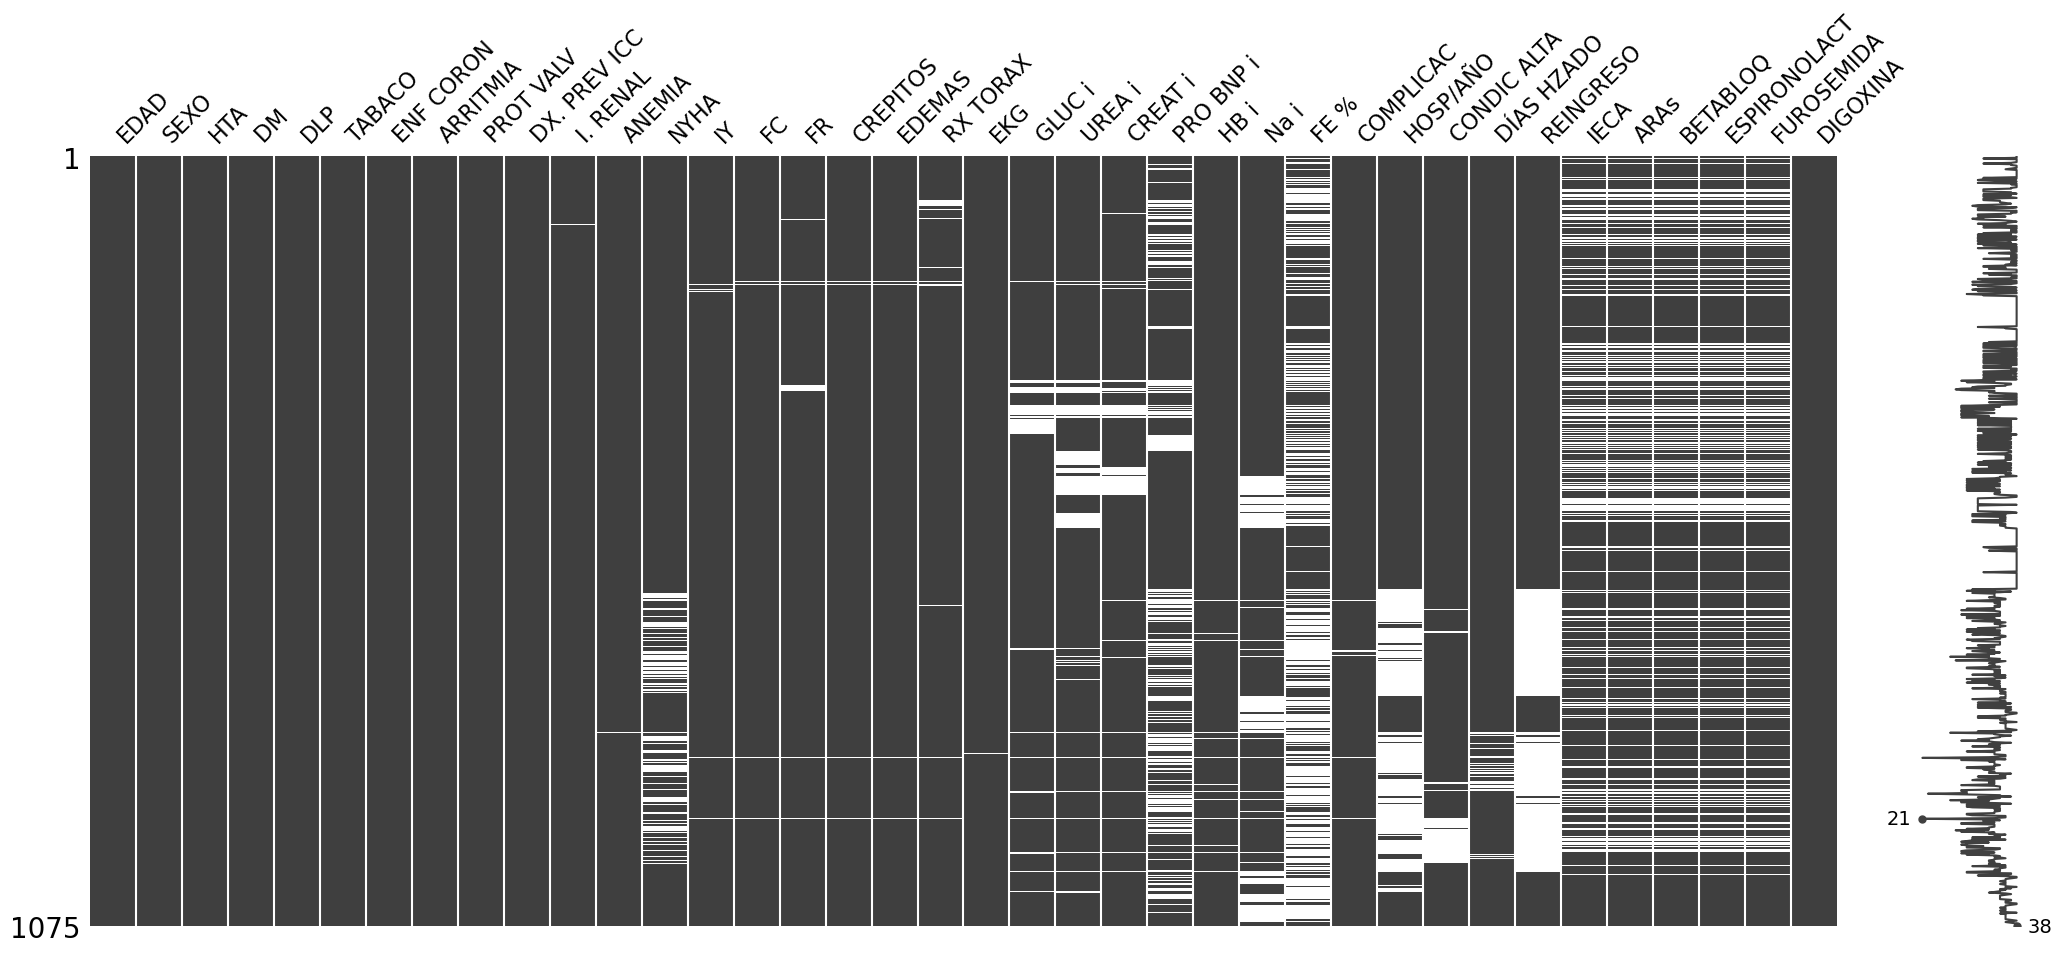

In [92]:
plt.figure()
msno.matrix(df)
plt.savefig("NN_db.png")

In [93]:
df["CONDIC ALTA"].unique()

array([ 1.,  0., nan,  2.])

## Reemplazamos el valor 2 del target por el valor 1

In [94]:
df["CONDIC ALTA"] = df["CONDIC ALTA"].replace({2:1})

In [95]:
df["CONDIC ALTA"].value_counts(dropna=False)

1.0    931
0.0     72
NaN     72
Name: CONDIC ALTA, dtype: int64

### Gráfica para ver si esta balanceada el dataset

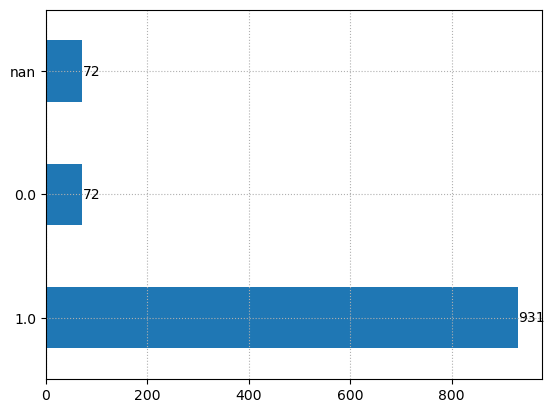

In [96]:
ax = df["CONDIC ALTA"].value_counts(dropna=False).plot(kind="barh")
ax.grid(ls=":")

for bars in ax.containers:
    ax.bar_label(bars)

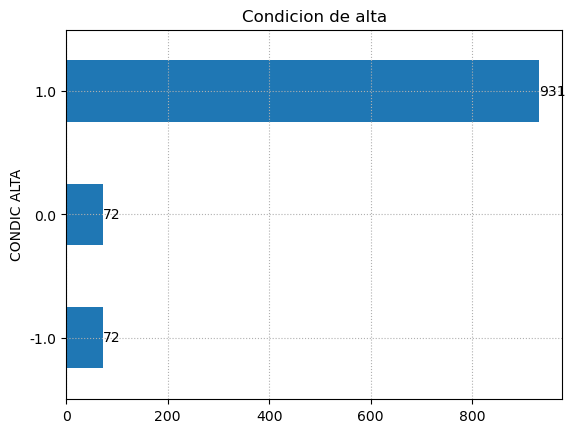

In [97]:
plt.title("Condicion de alta")
ax = df.fillna(-1).groupby(["CONDIC ALTA"])["CONDIC ALTA"].count().plot(kind="barh")
ax.grid(ls=":")

for bars in ax.containers:
    ax.bar_label(bars)

In [98]:
df["CONDIC ALTA"].isnull().sum()

72

## APlicamos la tecnica de imputación por KNN de n=1

In [99]:
imputer = KNNImputer(n_neighbors=1)
df_aux = imputer.fit_transform(df)

df2 = pd.DataFrame(df_aux, columns=df.columns)
df2.head()

,EDAD,SEXO,HTA,DM,DLP,TABACO,ENF CORON,ARRITMIA,PROT VALV,DX. PREV ICC,...,HOSP/AÑO,CONDIC ALTA,DÍAS HZADO,REINGRESO,IECA,ARAs,BETABLOQ,ESPIRONOLACT,FUROSEMIDA,DIGOXINA
0,85.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
1,91.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
2,78.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,88.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,81.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


<AxesSubplot:>

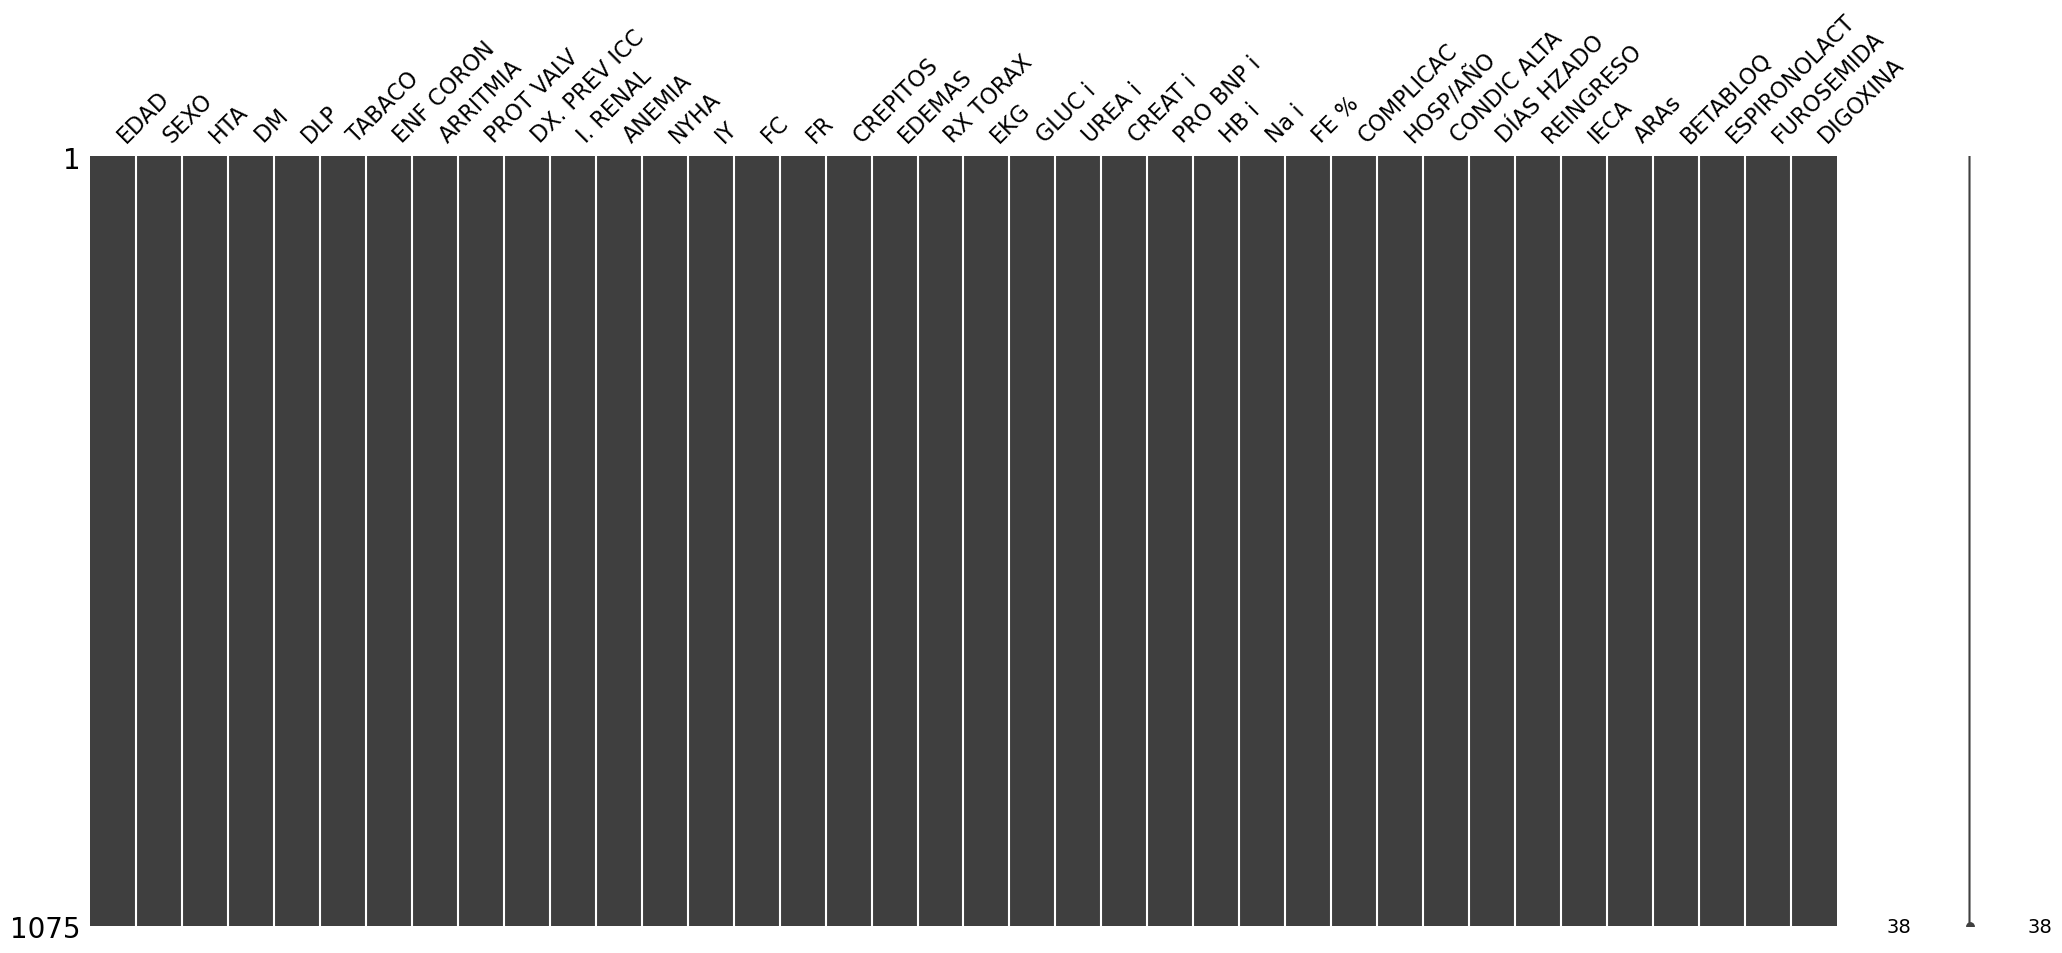

In [100]:
msno.matrix(df2)

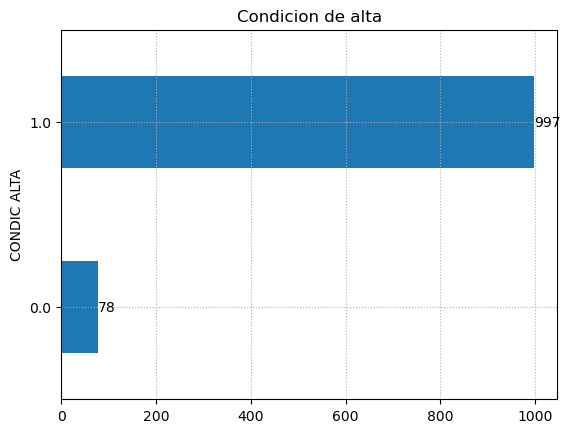

In [101]:
plt.title("Condicion de alta")
ax = df2.fillna(-1).groupby(["CONDIC ALTA"])["CONDIC ALTA"].count().plot(kind="barh")
ax.grid(ls=":")

for bars in ax.containers:
    ax.bar_label(bars)

## APlicamos oversampling usando SMOTE

In [102]:
df2.drop(["CONDIC ALTA"], axis=1)

,EDAD,SEXO,HTA,DM,DLP,TABACO,ENF CORON,ARRITMIA,PROT VALV,DX. PREV ICC,...,COMPLICAC,HOSP/AÑO,DÍAS HZADO,REINGRESO,IECA,ARAs,BETABLOQ,ESPIRONOLACT,FUROSEMIDA,DIGOXINA
0,85.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
1,91.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
2,78.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,88.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,81.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,60.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,4.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1071,74.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1072,75.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,4.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1073,74.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [103]:

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(df2.drop(["CONDIC ALTA"], axis=1), df2["CONDIC ALTA"])
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1.0: 997, 0.0: 997})


In [104]:
X_res["CONDIC ALTA"] = y_res

In [105]:
df3 = pd.DataFrame(X_res, columns=df.columns)
df3.head()

,EDAD,SEXO,HTA,DM,DLP,TABACO,ENF CORON,ARRITMIA,PROT VALV,DX. PREV ICC,...,HOSP/AÑO,CONDIC ALTA,DÍAS HZADO,REINGRESO,IECA,ARAs,BETABLOQ,ESPIRONOLACT,FUROSEMIDA,DIGOXINA
0,85.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
1,91.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
2,78.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,88.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,81.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


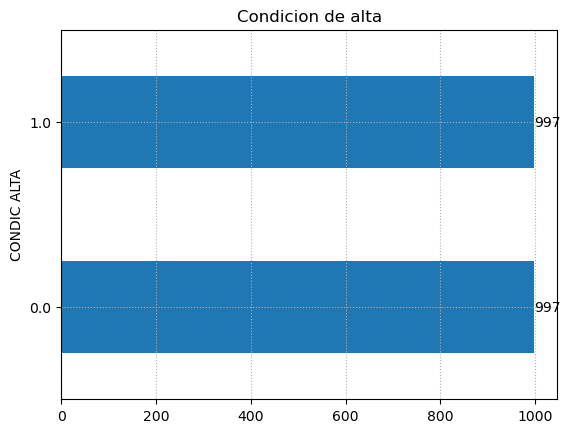

In [106]:
plt.title("Condicion de alta")
ax = df3.fillna(-1).groupby(["CONDIC ALTA"])["CONDIC ALTA"].count().plot(kind="barh")
ax.grid(ls=":")

for bars in ax.containers:
    ax.bar_label(bars)

## Escalamiento usando metodo de StandardScaler

In [107]:
scaler = StandardScaler()
         
scaler.fit(df3.drop(["CONDIC ALTA"], axis=1))
X_scaled = scaler.transform(df3.drop(["CONDIC ALTA"], axis=1))
X_scaled

array([[ 1.11759405, -1.2698824 , -1.29359919, ...,  2.05285161,
         1.09939959, -0.60928749],
       [ 1.72306642,  0.90888151,  0.906567  , ...,  2.05285161,
         1.09939959,  1.97968947],
       [ 0.41120961, -1.2698824 ,  0.906567  , ...,  2.05285161,
        -1.02259416, -0.60928749],
       ...,
       [ 0.22627311, -1.2698824 ,  0.47850635, ..., -0.56677464,
        -1.02259416, -0.60928749],
       [ 0.6470092 , -0.90748509,  0.906567  , ...,  1.61712497,
         0.74644496,  1.54906077],
       [ 0.13215784,  0.90888151, -0.45170946, ..., -0.56677464,
        -1.02259416, -0.60928749]])

In [108]:
#df_columns_no_cond_alta = list(df.columns).remove('CONDIC ALTA')
#print(df_columns_no_cond_alta)
l_aux = df.columns.tolist()
l_aux.remove('CONDIC ALTA')
print(l_aux)

['EDAD', 'SEXO', 'HTA', 'DM ', 'DLP', 'TABACO', 'ENF CORON', 'ARRITMIA', 'PROT VALV', 'DX. PREV ICC', 'I. RENAL', 'ANEMIA', 'NYHA', 'IY', 'FC', 'FR', 'CREPITOS', 'EDEMAS', 'RX TORAX', 'EKG', 'GLUC i', 'UREA i', 'CREAT i', 'PRO BNP i', 'HB i', 'Na i', 'FE %', 'COMPLICAC', 'HOSP/AÑO', 'DÍAS HZADO', 'REINGRESO', 'IECA', 'ARAs', 'BETABLOQ', 'ESPIRONOLACT', 'FUROSEMIDA', 'DIGOXINA']


In [109]:
df4 = pd.DataFrame(X_scaled, columns=l_aux)
df4.head()

,EDAD,SEXO,HTA,DM,DLP,TABACO,ENF CORON,ARRITMIA,PROT VALV,DX. PREV ICC,...,COMPLICAC,HOSP/AÑO,DÍAS HZADO,REINGRESO,IECA,ARAs,BETABLOQ,ESPIRONOLACT,FUROSEMIDA,DIGOXINA
0,1.117594,-1.269882,-1.293599,-0.729618,-0.475954,-0.509061,0.816364,-0.895227,3.862338,-1.652310,...,-0.669171,-0.641019,-0.600663,-0.626044,0.348354,-0.347464,0.301346,2.052852,1.099400,-0.609287
1,1.723066,0.908882,0.906567,-0.729618,-0.475954,-0.509061,0.816364,1.262781,-0.282706,0.685812,...,-0.669171,-0.641019,-0.600663,-0.626044,0.348354,-0.347464,0.301346,2.052852,1.099400,1.979689
2,0.411210,-1.269882,0.906567,1.608526,2.417308,-0.509061,-1.391307,-0.895227,-0.282706,-1.652310,...,-0.669171,-0.641019,-0.738643,-0.626044,0.348354,-0.347464,0.301346,2.052852,-1.022594,-0.609287
3,1.420330,-1.269882,0.906567,-0.729618,-0.475954,-0.509061,-1.391307,-0.895227,-0.282706,0.685812,...,-0.669171,-0.641019,-0.738643,-0.626044,0.348354,-0.347464,0.301346,-0.566775,-1.022594,-0.609287
4,0.713946,0.908882,0.906567,1.608526,-0.475954,-0.509061,0.816364,1.262781,-0.282706,0.685812,...,-0.669171,-0.641019,-0.600663,-0.626044,0.348354,-0.347464,0.301346,2.052852,-1.022594,-0.609287


In [110]:
df4["CONDIC ALTA"] = df3["CONDIC ALTA"]

In [111]:
df4.head()

,EDAD,SEXO,HTA,DM,DLP,TABACO,ENF CORON,ARRITMIA,PROT VALV,DX. PREV ICC,...,HOSP/AÑO,DÍAS HZADO,REINGRESO,IECA,ARAs,BETABLOQ,ESPIRONOLACT,FUROSEMIDA,DIGOXINA,CONDIC ALTA
0,1.117594,-1.269882,-1.293599,-0.729618,-0.475954,-0.509061,0.816364,-0.895227,3.862338,-1.652310,...,-0.641019,-0.600663,-0.626044,0.348354,-0.347464,0.301346,2.052852,1.099400,-0.609287,1.0
1,1.723066,0.908882,0.906567,-0.729618,-0.475954,-0.509061,0.816364,1.262781,-0.282706,0.685812,...,-0.641019,-0.600663,-0.626044,0.348354,-0.347464,0.301346,2.052852,1.099400,1.979689,1.0
2,0.411210,-1.269882,0.906567,1.608526,2.417308,-0.509061,-1.391307,-0.895227,-0.282706,-1.652310,...,-0.641019,-0.738643,-0.626044,0.348354,-0.347464,0.301346,2.052852,-1.022594,-0.609287,1.0
3,1.420330,-1.269882,0.906567,-0.729618,-0.475954,-0.509061,-1.391307,-0.895227,-0.282706,0.685812,...,-0.641019,-0.738643,-0.626044,0.348354,-0.347464,0.301346,-0.566775,-1.022594,-0.609287,0.0
4,0.713946,0.908882,0.906567,1.608526,-0.475954,-0.509061,0.816364,1.262781,-0.282706,0.685812,...,-0.641019,-0.600663,-0.626044,0.348354,-0.347464,0.301346,2.052852,-1.022594,-0.609287,1.0


In [112]:
df4.columns

Index(['EDAD', 'SEXO', 'HTA', 'DM ', 'DLP', 'TABACO', 'ENF CORON', 'ARRITMIA',
       'PROT VALV', 'DX. PREV ICC', 'I. RENAL', 'ANEMIA', 'NYHA', 'IY', 'FC',
       'FR', 'CREPITOS', 'EDEMAS', 'RX TORAX', 'EKG', 'GLUC i', 'UREA i',
       'CREAT i', 'PRO BNP i', 'HB i', 'Na i', 'FE %', 'COMPLICAC', 'HOSP/AÑO',
       'DÍAS HZADO', 'REINGRESO', 'IECA', 'ARAs', 'BETABLOQ', 'ESPIRONOLACT',
       'FUROSEMIDA', 'DIGOXINA', 'CONDIC ALTA'],
      dtype='object')

In [113]:
#sns.pairplot(df4, hue="CONDIC ALTA", height=2.5)


## SPlit de data

In [114]:
X = df4.drop(["CONDIC ALTA"], axis=1)
y = df4["CONDIC ALTA"]

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Creacion de modelos

### SVC

In [117]:
from sklearn.svm import SVC

clf_svc = SVC()
clf_svc.fit(X_train, y_train)

SVC()

In [118]:
y_pred = clf_svc.predict(X_test)

In [120]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       332
         1.0       1.00      0.96      0.98       327

    accuracy                           0.98       659
   macro avg       0.98      0.98      0.98       659
weighted avg       0.98      0.98      0.98       659



### RandomForest

In [122]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(max_depth=10, random_state=0)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       332
         1.0       0.97      0.99      0.98       327

    accuracy                           0.98       659
   macro avg       0.98      0.98      0.98       659
weighted avg       0.98      0.98      0.98       659



In [123]:
clf_rf.feature_importances_

array([0.02121511, 0.02011435, 0.05272094, 0.01226921, 0.00778969,
       0.00576306, 0.09398959, 0.01599843, 0.00535909, 0.01289883,
       0.02027372, 0.06311021, 0.01875469, 0.01440558, 0.01687022,
       0.01930323, 0.01784209, 0.01509867, 0.01053416, 0.03300287,
       0.01843173, 0.04732739, 0.03957543, 0.04188131, 0.0302415 ,
       0.03747404, 0.04967201, 0.07151188, 0.02464995, 0.03453365,
       0.00903737, 0.00983509, 0.00933706, 0.00086781, 0.00895299,
       0.02048235, 0.06887472])

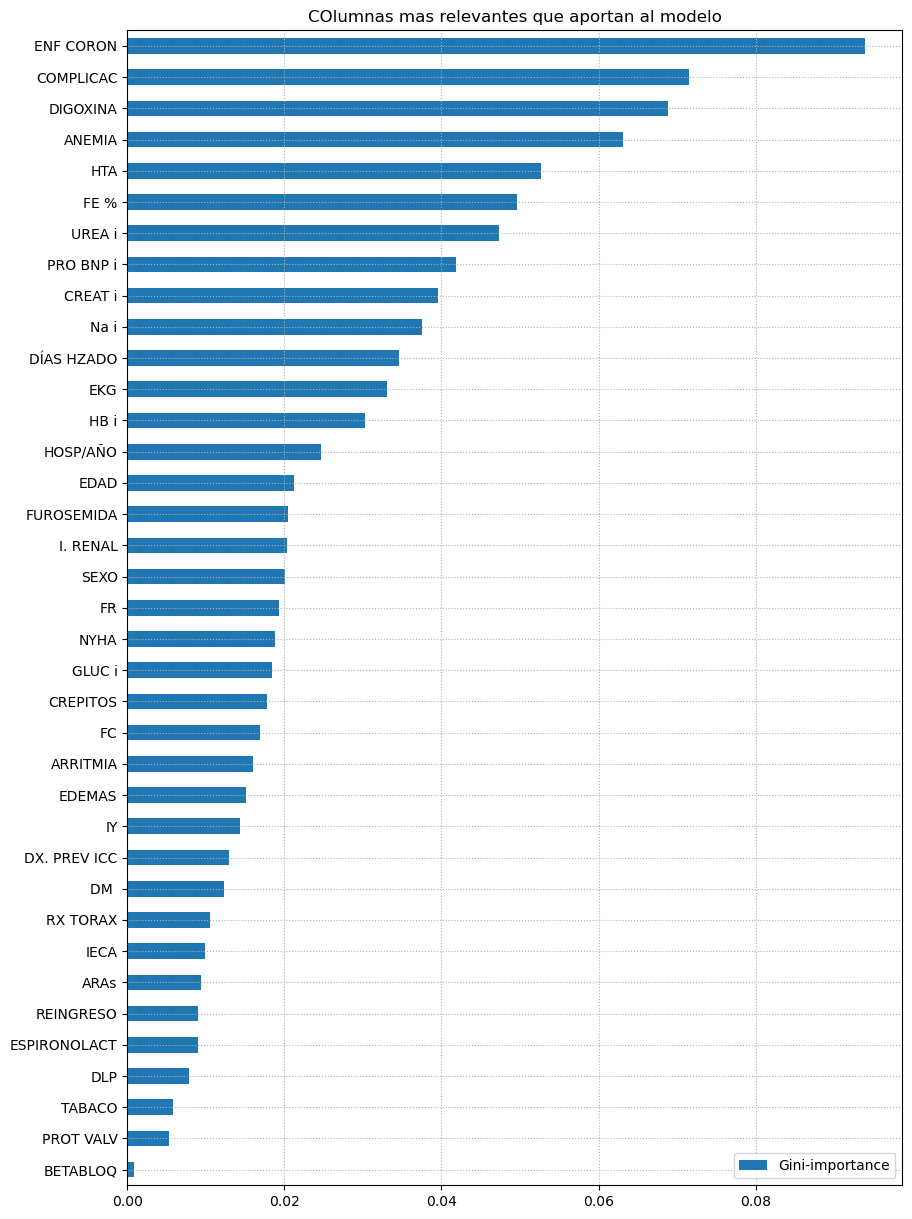

In [138]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(l_aux, clf_rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 


#fig = plt.figure(figsize=(10,15))

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
ax = importances.sort_values(by='Gini-importance').plot(kind='barh', rot=0,figsize=(10,15))
ax.grid(ls=":")
ax.set_title("COlumnas mas relevantes que aportan al modelo")
ax.legend(loc="lower right")
plt.show()